<font style='font-size:1.5em'>**üßë‚Äçüè´ Week 08 Lecture**</font><br>
<font style='font-size:1.3em;color:#888888'>NOTEBOOK 01: Collecting data from an API that requires authentication</font>

<font style='font-size:1.2em;color:#e26a4f;font-weight:bold'>LSE DS105A ‚Äì Data for Data Science (2024/25) </font>



<div style="color: #333333; background-color:rgba(226, 106, 79, 0.075); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 350px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;">

üóìÔ∏è **DATE:** 21 November 2024 

‚åö **TIME:** 16.00-18.00

üìç **LOCATION:** CLM.5.02
</div>


**AUTHORS:**  Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io)

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi)

**OBJECTIVE**: In Weeks 08 and 09, we will revisit the data science workflow (collection -> storage -> processing -> analysis -> visualization) but with new tools and techniques. We will cover how to use APIs that require authentication to collect data, we will revisit the notion of API endpoints and then, once we have collected the data, we will learn how to store it in a more structured way using databases.

<details style="width:70%;font-size:1em;border: 1px solid #aaa;border-radius: 4px;padding: .5em;margin-left:0em"><summary style="font-weight:bold">üñáÔ∏è EXPAND FOR USEFUL LINKS</summary>

- Python 3's [`venv` module documentation](https://docs.python.org/3/library/venv.html)

- W3 Schools' [HTTP Request Methods](https://www.w3schools.com/tags/ref_httpmethods.asp) page

- [Reddit API documentation](https://www.reddit.com/dev/api/)
- [Reddit API Rules](https://support.reddithelp.com/hc/en-us/articles/16160319875092-Reddit-Data-API-Wiki)

- The [JSON Crack Extension](https://marketplace.visualstudio.com/items?itemName=AykutSarac.jsoncrack-vscode) for VS Code to visually inspect JSON files.

- üêº pandas' [`pd.json_normalize()` function documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)

- [The `pydotenv` library](https://pypi.org/project/python-dotenv/)
- [What is the gitignore file?](https://www.atlassian.com/git/tutorials/saving-changes/gitignore)


Not covered here but relevant to your upcoming assignment:

- [Spotify API documentation](https://developer.spotify.com/documentation/web-api/)
- [Spotify Getting Started Guide](https://developer.spotify.com/documentation/web-api/quick-start/)

</details>


---

**‚öôÔ∏è SETUP**

Before you continue, set up your Python environment. Check the instructions under the ['üêç Python environment' section on README](../README.md#üêç-python-environment).

In [1]:
import os
import json
import requests

import pandas as pd

from dotenv import load_dotenv
from tqdm.notebook import tqdm
tqdm.pandas()

from IPython.display import Image

In [2]:
load_dotenv()

True

In [3]:
os.getenv("SPOTIFY_CLIENT_ID")

# 1. The Reddit API

In this lecture, I will show you how to collect data from an authenticated API, using Reddit as a case study. You are not required to create a Reddit account if you don‚Äôt want to. Pay close attention to my explanations and demonstrations, and think about how you can use these same methods with the Spotify API in the future.

<div style="color: #333333; background-color:#ffffff; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 10px 20px 5px 20px; margin: 10px 0 10px 10px; flex: 1 1 calc(65% - 20px);min-width: 250px;max-width: 450px;align-items:top;min-height: calc(45% - 20px); box-sizing: border-box;font-size:0.9em;">

Reddit is a social media platform where users can post links, text, images, and videos, which others can upvote, downvote, or comment on. Reddit consists of communities called subreddits, each focused on a specific topic. For example, [r/datascience](https://reddit.com/r/datascience) is dedicated to data science, while [r/aww](https://reddit.com/r/aww) features cute animals. Each subreddit has moderators who enforce its specific rules.

</div>

<details style="width:70%;font-size:1em;border: 1px solid #aaa;border-radius: 4px;padding: .5em;margin-left:0em"><summary>üîµ Click here if you want to set up a Reddit developer account </summary>


If you want to replicate the analysis in this notebook, you will need to:

- Create a [Reddit account](https://www.reddit.com/register/) (or reuse the one you already have)
- Then, follow these [First Steps](https://github.com/reddit-archive/reddit/wiki/OAuth2-Quick-Start-Example#first-steps) to create an app and get your credentials.
- Take note of your Reddit username and password, as well as the client ID and client secret of the app you created:

    ![](../figures/reddit/screenshot_reddit_app_details.png)

</details>



üëâüèª Let's browse the [Reddit API documentation](https://www.reddit.com/dev/api/) to see what's in there. 

Listen closely as I explain the different API endpoints and I comment the decisions around **pagination** implemented by the developers of the API.

## 1.1. Your credentials are sensitive information

Unlike OpenMeteo, Reddit requires authentication to access its API. This means we need to pass our username, password, client ID, and client secret to the API before we can make any requests.

we need to provide several sensitive pieces of information:

- your Reddit username (_do you want people to know it?_)
- your Reddit password, in plain text (_do you want people to know it?_)
- your Reddit app's client ID (_do you want anyone to send requests on your behalf?_)
- your Reddit app's client secret (_do you want anyone to send requests on your behalf?_)

If I leave this information in the notebook (on GitHub, especially), anyone reading it can impersonate me and send requests to Reddit on my behalf - a **serious security risk**.

**NEVER leave your credentials anywhere in your GitHub repository or notebook!**

üîä Louder for those in the back:

<div style="color: #333333; background-color:rgba(226, 106, 79, 0.075); border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 20px 0px 20px 10px; margin: 10px 0 10px 0; flex: 1 1 calc(45% - 20px);min-width: 250px;max-width: 750px;align-items:top;min-height: calc(75% - 20px); box-sizing: border-box;font-size:2.5em;">

‚ò£Ô∏è **NEVER leave your credentials anywhere in your GitHub repository or notebook!** ‚ò£Ô∏è

Even if you delete it afterwards, it will still be in the repository's history, and ANYONE can access it.
</div>


## 1.2 Using the `python-dotenv` library

Add a `.env` file to your project's root directory and fill it up like this:

```plaintext
REDDIT_USERNAME=your_username
REDDIT_PASSWORD=your_password
REDDIT_CLIENT_ID=your_client_id
REDDIT_CLIENT_SECRET=your_client_secret
```


After saving those credentials to a `.env` file I can load them into this notebook using the `python-dotenv` library:

In [4]:
# Load the .env file
load_dotenv()

True

Once I've loaded the .env file, they are stored in the `os.environ` dictionary, a safe place closer to your Operating System.

We can use `os.getenv()` to retrieve the values from the dictionary when passing to the Reddit API without ever looking at them.

```python
# If I were to run this code, I would expose my credentials to everyone
# as it would be saved in the notebook's output and in the repository's history forever (if I commit it).
os.getenv('REDDIT_USERNAME')
```

## 1.3 Getting an access token

Having a username, password, client ID, and client secret is not enough to get data from Reddit!

You still need to send a first request to the API to get an access token. This token is a string that you will pass in the headers of all subsequent requests to prove that you are who you say you are, and it has an expiration date.

**Setup the credentials before sending the request**


In [5]:
# We will still use the requests library, only this time we have to set up authentication parameters first
client_auth = requests.auth.HTTPBasicAuth(os.getenv("REDDIT_CLIENT_ID"), os.getenv("REDDIT_CLIENT_SECRET"))

You also need to send, via [HTTP POST](https://www.w3schools.com/tags/ref_httpmethods.asp), your Reddit username and password:

In [6]:
post_data = {"grant_type": "password", "username": os.getenv('REDDIT_USERNAME'), "password": os.getenv('REDDIT_PASSWORD')}

It is also a good practice to identify yourself in the `User-Agent` header, as Reddit documentation suggests.

In [7]:
headers = {"User-Agent": f"LSE DS105A (2024/25) API practice by {os.getenv('REDDIT_USERNAME')}"}

**Actually send the request**


In [ ]:
# From their documentation, I learned this is the endpoint I need
ACCESS_TOKEN_ENDPOINT = "https://www.reddit.com/api/v1/access_token"

# This time we are sending a HTTP POST instead of a HTTP GET
response = requests.post(ACCESS_TOKEN_ENDPOINT, auth=client_auth, data=post_data, headers=headers)
response.json()

If you configured everything correctly, you should get a response like this:

```json
{
    "access_token": "a_long_string_of_characters",
    "token_type": "bearer",
    "expires_in": 86400, // in seconds
    "scope": "*"
}
```

**Prepare a new header for future requests**

Let's store our token in a variable to use it in the next requests.

In [9]:
my_token = response.json()['access_token']

From now on, all my requests need to be followed by these HTTP HEADERS:

In [10]:
headers = {"Authorization": f"bearer {my_token}", "User-Agent": f"LSE DS105A (2024/25) API practice by {os.getenv('REDDIT_USERNAME')}"}

## 1.4 Making a request for data

Finally, we're ready to make a request for data. Let's get the top posts from the `r/datascience` subreddit.

In [11]:
# Using the headers and token we got from the previous step, we can now make authenticated requests to the Reddit API

# Get the top posts this year from the r/datascience subreddit
response = requests.get("https://oauth.reddit.com/r/datascience/top", headers=headers, params={"t": "year"})

top_posts = response.json()

Let's see what we've got:

In [12]:
# Save the data to the ../data/reddit/ folder using a name that indicates the time period and subreddit
with open("../data/reddit/datascience_top_year_2024_20.json", "w") as f:
    json.dump(top_posts, f)

After opening the JSON on VS Code and fiddling with the formatting, I observe that it has the following structure:

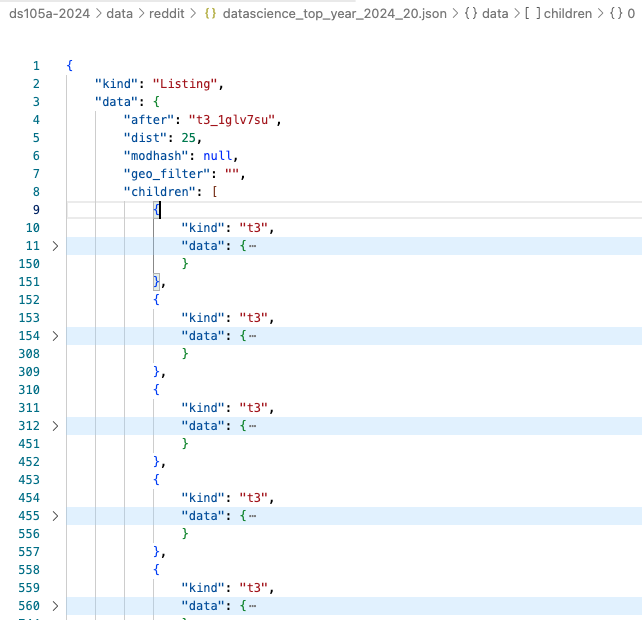

In [13]:
Image("../figures/reddit/json_listing_structure_example.png")

This JSON contains the top 25 posts from the `r/datascience` subreddit. Each post has a title, a score, a number of comments, and more. If this was your NB01 (for the upcoming assignment), you would now either keep downloading more top posts or focus on downloading complementary data for each post (e.g., comments).

Before saving, though, I recommend taking a quick look at the data to understand its structure better and perhaps already remove some initial unnecessary parts of the JSON.


## 1.5 Preliminary data exploration

I will load the JSON into pandas just to get a sense for how it will look like once I try to normalise it. This will help me decide if I keep the JSON as it is or if I make minor adjustments to how it is saved.

In [14]:
df = pd.read_json("../data/reddit/datascience_top_year_2024_20.json")
df

kind                                               data
after       Listing                                         t3_1glv7su
dist        Listing                                                 25
modhash     Listing                                               None
geo_filter  Listing                                                   
children    Listing  [{'kind': 't3', 'data': {'approved_at_utc': No...
before      Listing                                               None

üëÜüèª The JSON loads differently than the one we saw in Week 07.

**What happened here?**

- The top-level keys of the JSON are `kind` and `data`. They were converted into columns in the DataFrame.
- The `data` key is a dictionary, so its keys were converted into indices in the DataFrame.
- The true data is inside the `children` key, which is a list of dictionaries. Each dictionary represents a post.

<font style="color:#e26a4f;font-weight:bold;">**ALWAYS CHECK WHAT THE DATA LOOKS LIKE BEFORE YOU TRY TO NORMALISE IT**</font>

**Maybe I don't need the metadata**

I discovered that most of the top-level keys are metadata. When it's time to convert the JSON into a DataFrame, I only really need the `children` key. I can ignore the rest for now.

To get the data we want, we need to:

- Focus on the `children` index and `data` column of the DataFrame.

- Normalize the output of the `data` column into a new DataFrame.

Let's do this step-by-step

**Step 1:** Use the `.loc` accessor to select the `children` index and `data` column of the DataFrame.

In [15]:
# This returns the pure Python list that is stored in that cell of the DataFrame
type(df.loc['children', 'data'])

list

**Step 2:** Time to use `pd.json_normalize()` again! 

The result of `df.loc['children', 'data']` is a list of dictionaries, a type of nested structure that `pd.json_normalize()` can handle well.

In [16]:
# Step 2. Success!
df = pd.json_normalize(df.loc['children', 'data'])
df.head()

kind data.approved_at_utc data.subreddit  \
0   t3                 None    datascience   
1   t3                 None    datascience   
2   t3                 None    datascience   
3   t3                 None    datascience   
4   t3                 None    datascience   

                                       data.selftext data.author_fullname  \
0                                                                t2_sejrw   
1               What's your favourite one line code.         t2_dh9o0mnfv   
2                                                                t2_sejrw   
3  The year just started and there are already ov...                  NaN   
4  In summary and basically talks about how she w...          t2_uy28jztl   

   data.saved data.mod_reason_title  data.gilded  data.clicked  \
0       False                  None            0         False   
1       False                  None            0         False   
2       False                  None            0         False   
3       False                  None            0         False   
4       False                  None            0         False   

                                          data.title  ...  \
0               How to avoid 1/2-assed data analysis  ...   
1                          Favourite piece of code ü§£  ...   
2  You're not helping, Excel! please STOP HELPING!!!  ...   
3  Friendly reminder not to work too hard. You'll...  ...   
4            Data scientist quits her job at Spotify  ...   

  data.media_metadata.669eo83ac30d1.id  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

  data.media_metadata.xxrkz93ac30d1.status  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   data.media_metadata.xxrkz93ac30d1.e  data.media_metadata.xxrkz93ac30d1.m  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

  data.media_metadata.xxrkz93ac30d1.p  data.media_metadata.xxrkz93ac30d1.s.y  \
0                                 NaN                                    NaN   
1                                 NaN                                    NaN   
2                                 NaN                                    NaN   
3                                 NaN                                    NaN   
4                                 NaN                                    NaN   

   data.media_metadata.xxrkz93ac30d1.s.x  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

  data.media_metadata.xxrkz93ac30d1.s.u  data.media_metadata.xxrkz93ac30d1.id  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

  data.gallery_data.items  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  

[5 rows x 164 columns]

In [17]:
# What is in the data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 164 entries, kind to data.gallery_data.items
dtypes: bool(28), float64(23), int64(10), object(103)
memory usage: 27.4+ KB


ü•¥ 164 columns! OK, I'll handle this later.. 

# 2. Paginated requests

As you saw, the Reddit API returns a maximum of 25 posts per request by default. We can change this by passing the `limit` parameter in the URL but, still, the maximum number of posts we can get in a single request is 100. To get more posts, we need to make multiple requests. This is a common practice in APIs and is called **pagination**.

The way the Reddit API does it is by providing a `before` or `after` parameter in the URL. These parameters are used to specify the **listing** that comes before or after the current one. Every time we get a response, we can collect the `after` parameter returned and reuse it in the next request to get the next set of posts.

Let's see how we can get more posts from the `r/datascience` subreddit.

## 2.1 Create a function for making requests

As we will be repeating the same code multiple times, it is a good idea to create a function that will make the requests for us.

In [18]:
def get_next_top100_posts(subreddit, token, after=None):
    """
    Retrieves the next 100 top posts from a specified subreddit using the Reddit API.

    (this documentation was created with the help of GitHub Copilot)

    Args:
        subreddit (str): The name of the subreddit to retrieve posts from.
        token (str): The access token required for authentication.
        after (str, optional): The ID of the post to start retrieving from. Defaults to None.

    Returns:
        tuple: A tuple containing the list of posts and the ID of the last post retrieved.

    """
    headers = {"Authorization": f"bearer {token}", 
               "User-Agent": f"LSE DS105A (2024/25) API practice by {os.getenv('REDDIT_USERNAME')}"}
    
    params = {"t": "year", "limit": 100}

    if after:
        params['after'] = after
    
    response = requests.get(f"https://oauth.reddit.com/r/{subreddit}/top", headers=headers, params=params)

    json_response = response.json()

    # Let's be smart about this
    # Let's return the 'children' key of the 'data' key of the response
    # and the 'after' key of the 'data' key of the response
    return json_response['data']['children'], json_response['data']['after']

Testing that the function works:

In [19]:
posts, after = get_next_top100_posts("datascience", my_token)

There is an 'after':

In [20]:
after

't3_1b40em5'

And because of how I wrote the function, I will be able to normalise the `posts` list straight away:

In [21]:
pd.json_normalize(posts).head()

kind data.approved_at_utc data.subreddit  \
0   t3                 None    datascience   
1   t3                 None    datascience   
2   t3                 None    datascience   
3   t3                 None    datascience   
4   t3                 None    datascience   

                                       data.selftext data.author_fullname  \
0                                                                t2_sejrw   
1               What's your favourite one line code.         t2_dh9o0mnfv   
2                                                                t2_sejrw   
3  The year just started and there are already ov...                  NaN   
4  In summary and basically talks about how she w...          t2_uy28jztl   

   data.saved data.mod_reason_title  data.gilded  data.clicked  \
0       False                  None            0         False   
1       False                  None            0         False   
2       False                  None            0         False   
3       False                  None            0         False   
4       False                  None            0         False   

                                          data.title  ...  \
0               How to avoid 1/2-assed data analysis  ...   
1                          Favourite piece of code ü§£  ...   
2  You're not helping, Excel! please STOP HELPING!!!  ...   
3  Friendly reminder not to work too hard. You'll...  ...   
4            Data scientist quits her job at Spotify  ...   

  data.media_metadata.1zivd85a81gc1.status  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  data.media_metadata.1zivd85a81gc1.e  data.media_metadata.1zivd85a81gc1.m  \
0                                 NaN                                  NaN   
1                                 NaN                                  NaN   
2                                 NaN                                  NaN   
3                                 NaN                                  NaN   
4                                 NaN                                  NaN   

   data.media_metadata.1zivd85a81gc1.p data.media_metadata.1zivd85a81gc1.s.y  \
0                                  NaN                                   NaN   
1                                  NaN                                   NaN   
2                                  NaN                                   NaN   
3                                  NaN                                   NaN   
4                                  NaN                                   NaN   

   data.media_metadata.1zivd85a81gc1.s.gif  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

   data.media_metadata.1zivd85a81gc1.s.mp4  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  data.media_metadata.1zivd85a81gc1.s.x  data.media_metadata.1zivd85a81gc1.id  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2                                   NaN                                   NaN   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

  data.author_cakeday  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 362 columns]

## 3.2 Getting the next page of posts

Let's make use of the `after` parameter to get the next page of posts.

In [22]:
next_posts, after = get_next_top100_posts("datascience", my_token, after)

The 'after' should be different now: 

In [23]:
after

't3_1c74z15'

Then I can check that the posts are different:

In [24]:
pd.json_normalize(next_posts).head(4)

kind data.approved_at_utc data.subreddit  \
0   t3                 None    datascience   
1   t3                 None    datascience   
2   t3                 None    datascience   
3   t3                 None    datascience   

                                       data.selftext data.author_fullname  \
0  I‚Äôve noticed that many companies opt for Pytho...          t2_7zplwc2g   
1  I have been working with a guy and he has some...          t2_7n35ax5s   
2  Hello everyone! \n\nI was asked this question ...          t2_9oq19q3m   
3  I have found that many many people fail SQL in...         t2_x7a8w1w00   

   data.saved data.mod_reason_title  data.gilded  data.clicked  \
0       False                  None            0         False   
1       False                  None            0         False   
2       False                  None            0         False   
3       False                  None            0         False   

                                          data.title  ...  \
0  Why Most Companies Prefer Python Over R for Da...  ...   
1  How do I tell someone that there is nothing ne...  ...   
2  What are some typical ‚Äòrookie‚Äô mistakes Data S...  ...   
3                              SQL Interview Testing  ...   

  data.media_metadata.6y088bkthigc1.s.u data.media_metadata.6y088bkthigc1.id  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2                                   NaN                                  NaN   
3                                   NaN                                  NaN   

   data.media_metadata.cdtjg51rcujd1.status  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   

   data.media_metadata.cdtjg51rcujd1.e data.media_metadata.cdtjg51rcujd1.m  \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   

   data.media_metadata.cdtjg51rcujd1.p  data.media_metadata.cdtjg51rcujd1.s.y  \
0                                  NaN                                    NaN   
1                                  NaN                                    NaN   
2                                  NaN                                    NaN   
3                                  NaN                                    NaN   

  data.media_metadata.cdtjg51rcujd1.s.x  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   

   data.media_metadata.cdtjg51rcujd1.s.u data.media_metadata.cdtjg51rcujd1.id  
0                                    NaN                                  NaN  
1                                    NaN                                  NaN  
2                                    NaN                                  NaN  
3                                    NaN                                  NaN  

[4 rows x 291 columns]

# 3. The ultimate code

All the code we wrote in this notebook is the form of a tutorial. If I wanted to clean up my notebook and make it shorter, I would move the functions to a separate Python file, import them, and use them in the notebook.

This is a sample of how my NB01 would look like:

---

**OBJECTIVE:** Collect the top 1000 posts of the past year from the `r/datascience` subreddit and save them to a JSON file.

**AUTHOR:** [@jonjoncardoso](https://jonjoncardoso.github.io)

\<add some decoration here if I am feeling fancy\>

In [25]:
import os

from datetime import datetime

# Import all functions from the reddit_utils.py file
from reddit_utils import *

## 1. Authenticate to Reddit

Before I can make any requests to the Reddit API, I need to authenticate myself and get an access token.

In [26]:
token = authenticate()

#Checking that the authentication worked:
print(f"{'‚úÖ A' if token is not None else 'üö´ NO'} token was returned.")

‚úÖ A token was returned.


## 2. Get the top 1000 posts from the `r/datascience` subreddit

I will use my function `get_n_pages_of_top_posts()` to get the top 1000 posts from the `r/datascience` subreddit.

In [27]:
# This takes a few seconds to run
top1000_posts = get_n_pages_of_top_posts("datascience", token, 10)

Confirm that I have a list of 1000 posts:

In [28]:
print(f"The list returned by the function has {len(top1000_posts)} elements. {'YES!' if len(top1000_posts) == 1000 else 'OH NO!'}")

The list returned by the function has 1000 elements. YES!


## 3. Save the data to a JSON file

I have not done any pre-processing to this data yet, so I will save the resulting JSON to the `../data/reddit/raw/` folder.

I will identify the subreddit name in the filename, as well as the date and time of the request, so that I know when the data was collected.

In [29]:
# Ensure the folder exists before saving the file
folder = '../data/reddit/raw/'
os.makedirs(folder, exist_ok=True)

# Create a filename that is meaningful to future me
filename = f"datascience_top1000_{datetime.now().strftime('%Y_%m_%d_%H_%M')}.json"
filepath = os.path.join(folder, filename)

# In the future, I might want to use jsonlines instead of json
# https://stackoverflow.com/a/52393937
with open(filepath, 'w', encoding='utf-8') as f:
    json.dump(top1000_posts, f)

## 4. What's next

My work here is not done yet. I will need to clean this data, remove duplicates, and save it to a more structured format, like a database. More on that in [NB02](./W08-Lecture-NB02-Databases.ipynb).

I might also revisit this current notebook to include another endpoint (comments, for example) or to collect data from another subreddit.